In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

from dca import DynamicalComponentsAnalysis as DCA
from dca.cov_util import (calc_cross_cov_mats_from_data, calc_pi_from_cross_cov_mats,
                          form_lag_matrix)
from dca.synth_data import embedded_lorenz_cross_cov_mats, gen_lorenz_data
from dca.data_util import load_sabes_data
from dca.dca import pi_fft
from dca import style
from dca.plotting.fig2 import make_axes, disp_heatmap, disp_scatter, plot_deflation_results
from dca.analysis import (gen_pi_heatmap, make_pi_fn_gp, make_pi_fn_knn,
                          random_proj_pi_comparison, gp_knn_trajectories,
                          dca_deflation, dca_fft_deflation, dca_full, calc_pi_vs_dim)

In [2]:
#Generate 3D Lorenz data and cross-cov mats
T_pi_3d = 1
num_samples_3d = 10000
X_3d = gen_lorenz_data(num_samples_3d)
cross_cov_mats_3d = calc_cross_cov_mats_from_data(X_3d, 2*T_pi_3d)

#Generate high-D Lorenz data and cross-cov mats
T_pi_hd = 1
num_samples_hd = 10000
N_hd = 30
noise_dim = 7
snr = 1.
cross_cov_mats_hd, X_hd = embedded_lorenz_cross_cov_mats(N_hd, 2*T_pi_hd, snr=snr,
                                                         noise_dim=noise_dim,
                                                         return_samples=True,
                                                         num_lorenz_samples=num_samples_hd)

In [3]:
#Get GP and KNN PI functions for 3-D non-noisy Lorenz system
calc_pi_fn_gp_3d = make_pi_fn_gp(cross_cov_mats_3d)
calc_pi_fn_knn_3d = make_pi_fn_knn(X_3d, T_pi_3d)
#...and for high-D noisy Lorenz system
calc_pi_fn_gp_hd = make_pi_fn_gp(cross_cov_mats_hd)
calc_pi_fn_knn_hd = make_pi_fn_knn(X_hd, T_pi_hd)

In [ ]:
#Gen heatmaps for 3-D data
n_ang = 50
heatmap_gp = gen_pi_heatmap(calc_pi_fn_gp_3d, n_ang)
heatmap_knn = gen_pi_heatmap(calc_pi_fn_knn_3d, n_ang)

#Save results
np.savez("heatmaps.npz", heatmap_knn=heatmap_knn, heatmap_gp=heatmap_gp)

In [4]:
#Compare GP and KNN PI for 3-D and high-D data
n_proj = 10000
pi_gp_knn_3d = random_proj_pi_comparison(calc_pi_fn_gp_3d, calc_pi_fn_knn_3d,
                                         N=3, d=1, n_samples=n_proj)
pi_gp_knn_hd_1d = random_proj_pi_comparison(calc_pi_fn_gp_hd, calc_pi_fn_knn_hd,
                                            N=N_hd, d=1, n_samples=n_proj)
pi_gp_knn_hd_3d = random_proj_pi_comparison(calc_pi_fn_gp_hd, calc_pi_fn_knn_hd,
                                            N=N_hd, d=3, n_samples=n_proj)

#Save results
np.savez("proj_comp.npz",
         pi_gp_knn_3d=pi_gp_knn_3d,
         pi_gp_knn_hd_1d=pi_gp_knn_hd_1d,
         pi_gp_knn_hd_3d=pi_gp_knn_hd_3d)

sample 0 of 10000
sample 100 of 10000
sample 200 of 10000
sample 300 of 10000
sample 400 of 10000
sample 500 of 10000
sample 600 of 10000
sample 700 of 10000
sample 800 of 10000
sample 900 of 10000
sample 1000 of 10000
sample 1100 of 10000
sample 1200 of 10000
sample 1300 of 10000
sample 1400 of 10000
sample 1500 of 10000
sample 1600 of 10000
sample 1700 of 10000
sample 1800 of 10000
sample 1900 of 10000
sample 2000 of 10000
sample 2100 of 10000
sample 2200 of 10000
sample 2300 of 10000
sample 2400 of 10000
sample 2500 of 10000
sample 2600 of 10000
sample 2700 of 10000
sample 2800 of 10000
sample 2900 of 10000
sample 3000 of 10000
sample 3100 of 10000
sample 3200 of 10000
sample 3300 of 10000
sample 3400 of 10000
sample 3500 of 10000
sample 3600 of 10000
sample 3700 of 10000
sample 3800 of 10000
sample 3900 of 10000
sample 4000 of 10000
sample 4100 of 10000
sample 4200 of 10000
sample 4300 of 10000
sample 4400 of 10000
sample 4500 of 10000
sample 4600 of 10000
sample 4700 of 10000
samp

In [3]:
#Get trajectories through PI plane for 1-D and 3-D projections
num_traj = 5

traj_1d = gp_knn_trajectories(num_traj, cross_cov_mats_hd, X_hd, T_pi=T_pi_hd, d=1)
traj_3d = gp_knn_trajectories(num_traj, cross_cov_mats_hd, X_hd, T_pi=T_pi_hd, d=3)

#Save results
np.savez("trajectories.npz",
         traj_1d=traj_1d,
         traj_3d=traj_3d)

traj_idx = 0
0 of 95
50 of 95
traj_idx = 1
0 of 99
50 of 99
traj_idx = 2
0 of 98
50 of 98
traj_idx = 3
0 of 107
50 of 107
100 of 107
traj_idx = 4
0 of 102
50 of 102
100 of 102
traj_idx = 0
0 of 323
50 of 323
100 of 323
150 of 323
200 of 323
250 of 323
300 of 323
traj_idx = 1
0 of 244
50 of 244
100 of 244
150 of 244
200 of 244
traj_idx = 2
0 of 510
50 of 510
100 of 510
150 of 510
200 of 510
250 of 510
300 of 510
350 of 510
400 of 510
450 of 510
500 of 510
traj_idx = 3
0 of 298
50 of 298
100 of 298
150 of 298
200 of 298
250 of 298
traj_idx = 4
0 of 367
50 of 367
100 of 367
150 of 367
200 of 367
250 of 367
300 of 367
350 of 367


In [3]:
#Run analysis for 3 methods(deflation, FFT+deflation, regular DCA)
#Download data, this will only download once, but it is a large file
fname = 'indy_20160627_01.mat'
if not os.path.isfile(fname): # check if file was already downloaded
    tmp = f"{fname}_tmp"
    urllib.request.urlretrieve('https://zenodo.org/record/583331/files/indy_20160627_01.mat?download=1', tmp)
    os.rename(tmp, fname)

data = load_sabes_data(fname, bin_width_s=.05, preprocess=True)
X = data['M1'][:-1]
Y = data['cursor']
T_pi = 5
n_proj = 20
n_init = 1

cross_cov_mats = calc_cross_cov_mats_from_data(X, T=2*T_pi)

V_def = dca_deflation(cross_cov_mats, n_proj=n_proj, n_init=n_init)
V_fft = dca_fft_deflation(X, T=2*T_pi, n_proj=n_proj, n_init=n_init)
V_seq = dca_full(cross_cov_mats, n_proj=n_proj, n_init=n_init)

pi_def = calc_pi_vs_dim(cross_cov_mats, V=V_def)
pi_fft = calc_pi_vs_dim(cross_cov_mats, V=V_fft)
pi_regular = calc_pi_vs_dim(cross_cov_mats, V_seq=V_seq)

np.savez("def_comp_50ms.npz", pi_def=pi_def, pi_fft=pi_fft, pi_regular=pi_regular)

0
10
0
10
0
10


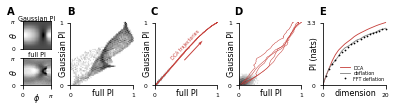

In [4]:
#Plot results

axes = make_axes(5.5, wpad_mid=0.05, hpad_bottom=0.13, hpad_top=0.16, wpad_edge=0.04)
ax1, ax2, ax3, ax4, ax5, ax6 = axes
knn_name = "full PI"
gaussian_name = "Gaussian PI"

#Plot heatmaps
d1 = np.load("heatmaps.npz")
heatmap_gp, heatmap_knn = d1["heatmap_gp"], d1["heatmap_knn"]
disp_heatmap(ax1, heatmap_gp, title=gaussian_name, show_xlabels=False, show_ylabels=True)
disp_heatmap(ax2, heatmap_knn, title=knn_name, show_xlabels=True, show_ylabels=True)

#Plot trajectories + scatters
d2 = np.load("proj_comp.npz")
pi_gp_knn_3d = d2["pi_gp_knn_3d"]
pi_gp_knn_hd_1d = d2["pi_gp_knn_hd_1d"]
pi_gp_knn_hd_3d = d2["pi_gp_knn_hd_3d"]
d3 = np.load("trajectories.npz", allow_pickle=True)
traj_1d = d3["traj_1d"]
traj_3d = d3["traj_3d"]
disp_scatter(ax3, pi_gp_knn_3d[:, 0], pi_gp_knn_3d[:, 1], xlabel=knn_name, arrow=False)
disp_scatter(ax4, pi_gp_knn_hd_1d[:, 0], pi_gp_knn_hd_1d[:, 1], trajectories=traj_1d, diag_text=True, arrow=True, xlabel=knn_name, ylabel=gaussian_name)
disp_scatter(ax5, pi_gp_knn_hd_3d[:, 0], pi_gp_knn_hd_3d[:, 1], trajectories=traj_3d, arrow=False, xlabel=knn_name, ylabel=gaussian_name)

#Plot deflation stuff
d4 = np.load("def_comp_50ms.npz")
pi_regular = d4["pi_regular"]
pi_fft = d4["pi_fft"]
pi_def = d4["pi_def"]
plot_deflation_results(ax6, pi_regular, pi_def, pi_fft)

plt.savefig("fig2.pdf", dpi=300)